# EDA Project: Instacart Shopping Trends Analysis
This is a project that aims to understand the shopping behavior of customers who shop for groceries at Instacart. 
To understand the source data better I opened it on Notes and realized that rather than the standard ','which is the typical separator for csv files, the separator in this case is ';' which would need to be incorporated when reading the file. I also noted that various numerical values like aisle and days since prior order are entered as rational numbers and not integers.
In the following series of code we will read in the files using the appropriate arguments and call info on them to get a sense of the missing values.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
#read in the instacart_orders file
orders = pd.read_csv( 'https://www.dropbox.com/scl/fi/lremdww25nj8sqpa7ebqn/instacart_orders.csv?rlkey=lelsxbc7ppqhrdylc0omxt2o8&dl=1', sep=';')
#read in the products file
products = pd.read_csv('https://www.dropbox.com/scl/fi/tp8wjsndxtoxficgnvdaf/products.csv?rlkey=cs2q3sxdvmlfsa05shnm9hw4q&dl=1', sep=';')
#read in the aisles file
aisles = pd.read_csv('https://www.dropbox.com/scl/fi/3l4fc1bi84frnrqptqofh/aisles.csv?rlkey=sn7j4bcai046lev66g20moz65&dl=1', sep=';')
#read in department file
departments = pd.read_csv('https://www.dropbox.com/scl/fi/ljbrv0o41s9vznreptxcs/departments.csv?rlkey=ud7hmcvno0hnucpr650m2806j&dl=1',sep=';')
#read in product file
order_products = pd.read_csv( 'https://www.dropbox.com/scl/fi/enej8zjr78g7j2ksm4u01/order_products.csv?rlkey=91sxutcgvqsp3pqx4i3eqxch6&dl=1', sep=';')

In [3]:
#call info on the different files
orders.info()
display(orders.head(5))
products.info()
display(products.head(5))
aisles.info()
display(aisles.head(5))
departments.info()
display(departments.head(5))
order_products.info(show_counts=True)
display(order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


After reading the files, it appears that largely the columns are in the right category, except perhaps days_since_prior_order on the instacart_orders file and add_to_cart_order in the order_products file which would ideally be categorized as integers. At first glance, there are no missing values in the aisle and department files. In the remaining files, the missing/null values seem largely confined to one column in each. 
Days since prior order has roughly 20,000 missing values in the instacart file, less than 10% of the records.
2.5% of the data in the product_names column in the products file is missing.
And 836 records in the add_to_cart_order column in the order_products file is missing, which is quite negligible considering that the file stores 4545007 orders. 
The bigger issue may be the lack of documentation of which day of the week 0-6 number values corresponds to. Assumptions will need to be made based on purchase volume or frequency on these days. For example, hig purchase volume or frequency indicates a weekend day especially if it does not drop during working hours.
Another way would be to assume that in standard calendars and business settings, days of the week usually range sunday to saturday. Using this system, sunday=0, monday=1, tuesday=2, wednesday=3, thursday=4, friday=5, saturday=6.
**in the light of later analysis this has been corrected to reflect saturday=0 and sunday =1**

## Data Pre-Processing

### `orders` data frame

In [7]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_10 = orders[(orders['order_dow'] == 4) & (orders['order_hour_of_day'] == 2)]
print(f"Number of orders placed on wednesday at 2:00 AM is: {wed_10['order_number'].sum()}")

Number of orders placed on wednesday at 2:00 AM is: 2078


In [9]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [10]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [11]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

In this case given the nature of the data recorded, rows that are identical should be removed since they represent copies of the same purchase which could alter the results of any analysis. It would also make sense to check whether any of the order_id values are repeated since these should be a unique identifier. If any of these repeat, we should inspect the other columns and consolidate them or eliminate them as needed.
I have started by checking the number of duplicated rows using duplicated()with sum() on orders to get a count of the duplicate rows. There were 15 duplicate rows. These were removed using drop_duplicates() and the result checked by calling duplicated() with sum() on the orders() daframe again. In this case, the result was 0, which means the duplicate rows were successfully removed.
Next, we needed to see if order_ids have been duplicated (these should theoretically be unique identifiers for the purchase). This was checked by calling duplicated on the order_id column of the orders data frame. The result of this operation was 0 implying that order ids have not been duplicated in the orders data frame.

### `products` data frame

In [14]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [15]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products['product_name'].duplicated().sum()

1361

In [17]:
# Check for duplicate product names that aren't missing
#First we create a new data series called duplicates that collects the values in column product_name after removing missing(na)values

duplicates = products['product_name'].dropna().duplicated()

#When I first ran this code it failed and I realized it was because the indexing had changed with the creation of the new series

#We re-index the new series so that the index values match the index of the original data frame

#We need to fill missing values that have been removed, it will be filled with False

duplicates_with_index = duplicates.reindex(products.index, fill_value=False)

#We now have a filter to get the product names that have been duplicated which is a series that returns True for duplicated rows
#We filter the original data frame on this boolean series to find the rows with duplicated product names from products

products_with_duplicates = products[duplicates_with_index]

#print the number of product names that are duplicated

print(products_with_duplicates['product_name'].nunique())
display(products_with_duplicates['product_name'].value_counts())

#print a random sample of the data frame that contains duplicate product name rows

display(products_with_duplicates.head(20))

103


product_name
green tea with ginseng and honey            2
chili with beans                            1
ibuprofen tablets 200 mg                    1
blanc de noirs                              1
original bbq sauce                          1
                                           ..
muenster cheese slices                      1
potatoes o'brien with onions and peppers    1
beef chili with beans                       1
candy bar                                   1
burrito- steak & cheese                     1
Name: count, Length: 103, dtype: int64

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
10410,10411,cauliflower head,83,4
12820,12821,pumpkin spice,53,16
14961,14962,hearts of palm,81,15
15659,15660,cream of tartar,104,13
16484,16485,lasagna with meat sauce,38,1


In [18]:
#looking at the difference in column values in products when we filter using product name
#we look at 3 different product names to understand the trends
products_gt = products[products['product_name'] == 'green tea with ginseng and honey']
products_biotin = products[products['product_name'] == 'biotin 1000 mcg']
products_ct = products[products['product_name'] == 'cream of tartar']

#print the filtered dataframes that we obtained earlier so that we can look at the values for different columns
display(products_gt)
display(products_biotin)
display(products_ct)

,product_id,product_name,aisle_id,department_id
2037,2038,green tea with ginseng and honey,94,7
5455,5456,green tea with ginseng and honey,96,20
19813,19814,green tea with ginseng and honey,94,7


,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
2058,2059,biotin 1000 mcg,47,11


,product_id,product_name,aisle_id,department_id
6134,6135,cream of tartar,104,13
15659,15660,cream of tartar,104,13


In the products data frame there are 104 product names that are duplicated once you ignore missing values in the product name category. That is, each product name has been duplicated on average 13 times(including the NA values). To investigate this further, we looked at a random sample of rows from this data frame of duplicated rows. Green tea with ginseng is a value that appeared twice in value counts, why do we have 2 products with this name even in the data frame that explicitly selects for duplicated values. If we look at the product names, these are different, interestingly the aisle and department names of these products are different too. We cannot collapse them into one category without losing this information. These are likely two products located on different aisles and different departments. Perhaps one is a health drink and the other for regular use. We need to look at the department info to be sure.
Further, when we went back to the original data frame and examined a few product names to see why there are so many duplicated names in this data set, we see that thouugh the column values are almost identical, product_ids always differ. Therefore collapsing the category based on names could lead to loosing information on product_ids.
However, just looking at some of these categories and their frequencies, it is likely that missing values in product name account for a lot of product name duplications in this data set.

### `departments` data frame

In [21]:
# Check for fully duplicate rows
departments.duplicated().sum()

0

In [22]:
# Check for duplication within individual columns of the dataframe
departments['department_id'].duplicated().sum()
departments['department'] = departments['department'].str.lower()
print(f"There are {departments['department'].duplicated().sum()} duplicated entries in the department column of the departments dataframe")

#the dataframe only has 21 rows so printing the whole dataframe makes sense to be sure that we did not miss anything
display(departments)

There are 0 duplicated entries in the department column of the departments dataframe


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


It appears to have no duplications. It would make sense to collapse department 'missing' with 'other' since both imply that the department value is not known. However, we could look further into the data to be sure.

### `aisles` data frame

In [25]:
# Check for fully duplicate rows
aisles.duplicated().sum()


0

In [26]:
# Check for duplication within individual columns
print(aisles['aisle_id'].duplicated().sum())
aisles['aisle'] = aisles['aisle'].str.lower()
print(aisles['aisle'].duplicated().sum())

#creating a new series that examines the column once missing(na) values are removed
aisles_nomiss = aisles['aisle'].dropna()

#We reindex the series using the original aisles index so that it can be used later for filtering if needed, same as we did for products dataframe earlier
aisles_nomiss_reindex = aisles_nomiss.reindex(aisles.index, fill_value=False)

#we print the reindexed series
print(aisles_nomiss_reindex)

0
0
0           prepared soups salads
1               specialty cheeses
2             energy granola bars
3                   instant foods
4      marinades meat preparation
                  ...            
129      hot cereal pancake mixes
130                     dry pasta
131                        beauty
132    muscles joints pain relief
133    specialty wines champagnes
Name: aisle, Length: 134, dtype: object


It appears that there are no duplications for aisle.

### `order_products` data frame

In [29]:
# Check for fully duplicate rows
order_products.duplicated().sum()

0

In [30]:
# Double check for any other tricky duplicates
#Let us check if there are missing (na) values in the order_id column, could lead to column specific duplicates not reflected at a row level
print(order_products['order_id'].nunique())
print(order_products['order_id'].nunique(dropna=False))

#Are there rows where column and product name are identical? It would be a duplicate that goes undetected at the row level
#However, this can be seen as a true duplicate since the same product for the same order usually need not be recorded more than once
order_products.duplicated(subset=['order_id', 'product_id']).sum()

450046
450046


0

There are now row level duplicates.
There could be column level duplicates since there are fewer order_id values than the length of the data frame. However, this inflation is not because of missing(na) values since the number of unique values remian the same whether we drop or retain na as a category. The repeats are most likely when multiple products are part of the same order. 
When we investigated combinations of order_ids and product_ids that were identical, none were observed. If they were we would need to investigate the add_to_cart_order value to truly make a decision but there were none and it was deemed unnecessary to investigate further. And at this level, there appear to be no duplications.

## Handling Missing Values


### `products` data frame

In [34]:
#how many missing values in the product_name column
products['product_name'].isna().sum()

1258

In [35]:
# Are all of the missing product names associated with aisle ID 100
#We will use a for loop after filtering the dataset for rows where the product_name is missing
#the loop will iterate through each row and increase the counter value by one every time the aisle_id is 100
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [36]:
# Reviewer's code 
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [37]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


In [38]:
# What is this aisle and department?
departments_21 = departments[departments['department_id']==21]
display(departments_21)
aisles_100 = aisles[aisles['aisle_id']==100]
display(aisles_100)

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


In [39]:
# Fill missing product names with 'Unknown'
products['product_name']=products['product_name'].fillna('Unknown')
#checking that the replacement was successful by filtering on the department value and printing the resulting dataframe
prods_miss = products[products['department_id']==21]
display(prods_miss)

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


There are 1258 missing values in the product name column which is a small percentage and should not affect the analysis adversely. It appears that all the missing values in the products dataset are confined to one aisle and department denoted as missing in the corresponding department and aisle datasets. Replacing this with 'Unknown' should simplify the analysis considerably.

### `orders` data frame

In [42]:
#Inspect number of missing values in the days since prior order column, only column with missing values
print(orders['days_since_prior_order'].isna().sum())

28817


In [43]:
# Are there any missing values where it's not a customer's first order?
pre_order = orders[orders['order_number']!=1]
display(pre_order.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

The only values missing in this data as mentioned earlier are in the days since prior order column. 
And none of these missing values occur for repeat customers. This makes sense since first time shoppers should not have an entry in the days since prior order column since they have no prior orders.

### `order_products` data frame

In [46]:
print(order_products['add_to_cart_order'].isna().sum())

836


In [47]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [48]:
#generate unique user_id values from the missing_values dataframe
#first we filter the data frame on add to cart values that are missing
missing_values = order_products[order_products['add_to_cart_order'].isna()]
missing_values.info()
#we then generate a series that contains unique order_id values
missing_val_unique_id = missing_values['order_id'].unique()
#we print the number of unique order ids to get a sense of how many orders are involved
print(f"There are {missing_values['order_id'].nunique()} user_ids associated with missing add to cart values in the order_products data frame")
#print the unique order_ids series
print(missing_val_unique_id)

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 737 to 4535739
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           836 non-null    int64  
 1   product_id         836 non-null    int64  
 2   add_to_cart_order  0 non-null      float64
 3   reordered          836 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 32.7 KB
There are 70 user_ids associated with missing add to cart values in the order_products data frame
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 159

In [49]:
# Do all orders with missing values have more than 64 products?
#Filter the user_id data frame on the unique order_id series generated earlier which will give rows that have missing add to cart values
unique_order_prod = order_products[order_products['order_id'].isin(missing_val_unique_id)]
#We now groupby order_id on this new dataframe and count the products assocuated with each product id 
unique_order_prod_counts = unique_order_prod.groupby('order_id')['product_id'].count()
#we then apply a condition on the resulting series to filter for order_ids that do not have more than 64 orders
unique_order_prod_counts_not64above = unique_order_prod_counts[~unique_order_prod_counts>64]
#we print the resulting series
display(unique_order_prod_counts_not64above)

Series([], Name: product_id, dtype: int64)

All the orders with missing add to cart values contain more than 64 orders.

In [51]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Add to cart order is the only variable with missing values in this data set. When we consider that values for this variable range from 0 to 64, it makes sense to consider whether the orders for which add_to_cart_order are missing have more than 64 products purchased per order. It appears that these orders do not have more than 64 orders, in fact they are below 64 for all of these. This can be seen both from the groupby list, batch, as well as the conditional filter on this list that looks at orders on this list that have more than 64 products which returns an empty series. We have been asked to replace the missing values with 999 and convert to integer type which is good for later data analysis since order of addition has to be an integer but because of the missing values it was being categorized as a float. However, in this instance since all the missing values have products in the range of less than 64 items, does it not make more sense to use the mean or median?

## Preliminary Data Exploration

###  Are `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)?

In [55]:
#we create a counter that increases by one when order_hour_of_day does not fit parameters
#if this counter is 0 at the end of the loop, that means the values are sensible
incorrect_hour = 0
for x, row in orders.iterrows():
    if row['order_hour_of_day'] <0 and row['order_hour_of_day']>23:
        incorrect_hour += 1
print(incorrect_hour)
if incorrect_hour == 0:
   print("The values in the order_hour_of_day column are all sensible")

0
The values in the order_hour_of_day column are all sensible


In [56]:
#we create a counter that increases by one when order_dow does not fit parameters
#if this counter is 0 at the end of the loop, that means the values are sensible
incorrect_day = 0
for x, row in orders.iterrows():
    if row['order_dow'] <0 and row['order_dow']>6:
        incorrect_day += 1
print(incorrect_day)
if incorrect_day == 0:
   print("The values in the order_dow column are all sensible")

0
The values in the order_dow column are all sensible


### What time of day do people shop for groceries?

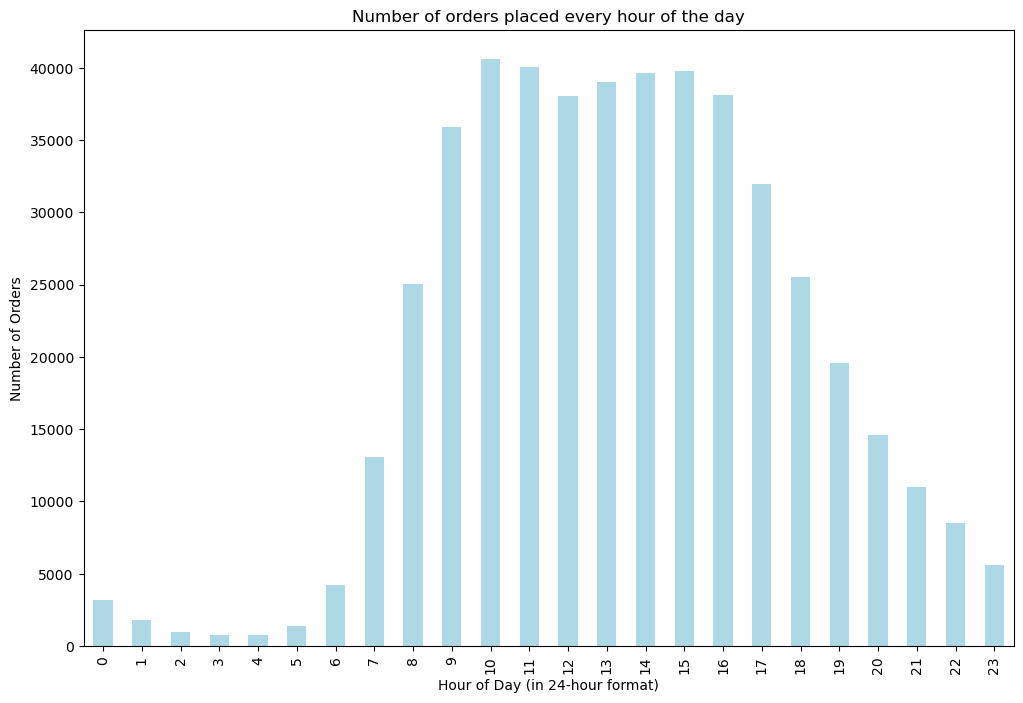

The time of day when people shop the most is:10 AM


In [58]:
#we start by grouping the orders by hour of the day and then counting the number of orders for each time slot
orders_time = orders.groupby('order_hour_of_day')['order_id'].count()

#we plot this as a bar graph
orders_time.plot(kind='bar',
                 title='Number of orders placed every hour of the day',
                            xlabel='Hour of Day (in 24-hour format)',
                            ylabel='Number of Orders',
                            figsize=[12, 8],
                            color='LightBlue')
plt.show()

#we assign the index of the series where the number of orders is the highest to a variable t_max
t_max = orders_time.idxmax()

#the t_max however is a value that denotes hour of the day when the request was for time
#we convert hour of the day to time using a function
def convert_time(hour):
    if hour == 0:
        return '12 AM'
    elif hour == 12:
        return '12 PM'
    elif hour > 12:
        return f'{hour - 12} PM'
    else:
        return f'{hour} AM'
    
#we pass t_max to this conversion function when we print the output to get the time
print(f"The time of day when people shop the most is:{convert_time(t_max)}")

We have determined that all the values in the order_hour_of_day and order_dow columns are sensible.
Consequently, we have determined that most orders are placed around 10 in the morning. 
When we examine the bar plot we observe that most shopping happens between 9 in the morning and 5 in the evening. The shopping drops gradually through the evening until midnight, when most people are asleep, and there is little to no activity until the early risers lead to traffic increasing again around 7 and gradually rising.

### What day of the week do people shop for groceries?

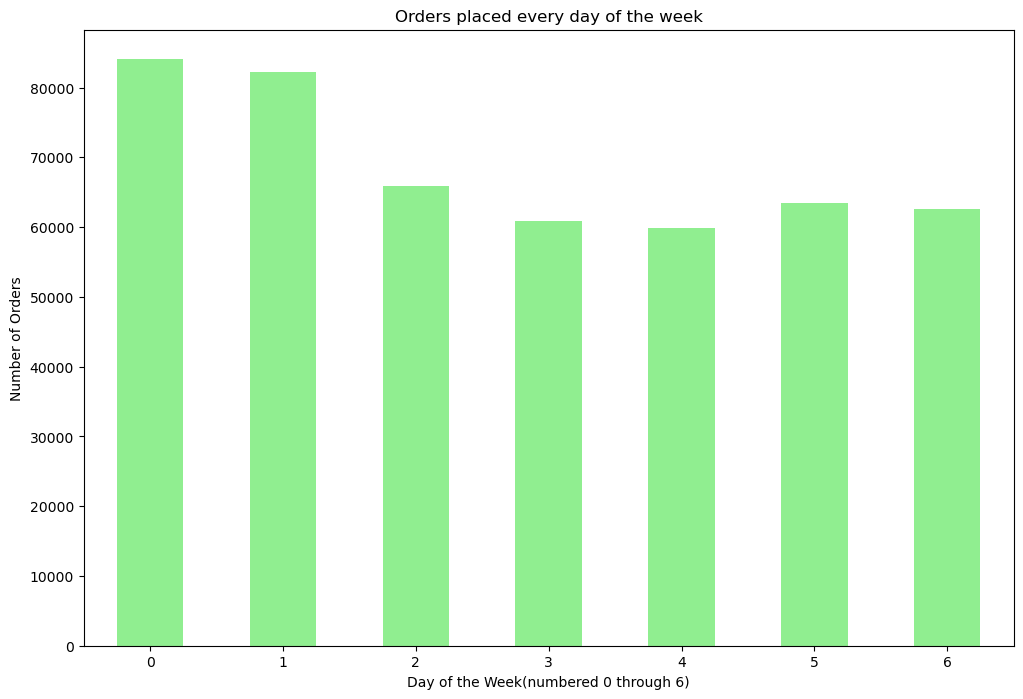

In [61]:
#we start by grouping the orders by day of the week and then counting the number of orders for each time slot
orders_day = orders.groupby('order_dow')['order_id'].count()

#We plot this as a bar graph
orders_day.plot(kind='bar',
                title='Orders placed every day of the week',
                            xlabel='Day of the Week(numbered 0 through 6)',
                            ylabel='Number of Orders',
                            figsize=[12, 8],
                            color='LightGreen',
                            rot=0)

plt.show()

From the graphy is it clear that day 0 and 1 have the most shoppers, which indicates that this is likely the weekend. Unlike my earlier assumption I think in this case 0 stands for Saturday and 1 for Sunday. We need to reassign earlier values acccordingly. People prefer to shop on Saturdays and Sundays. This tallies with the fact that people have more time to shop over the weekends. However, there is not a huge drop in traffic through the week which points to the convenience of online shopping like instacart.

### How long do people wait until placing another order?

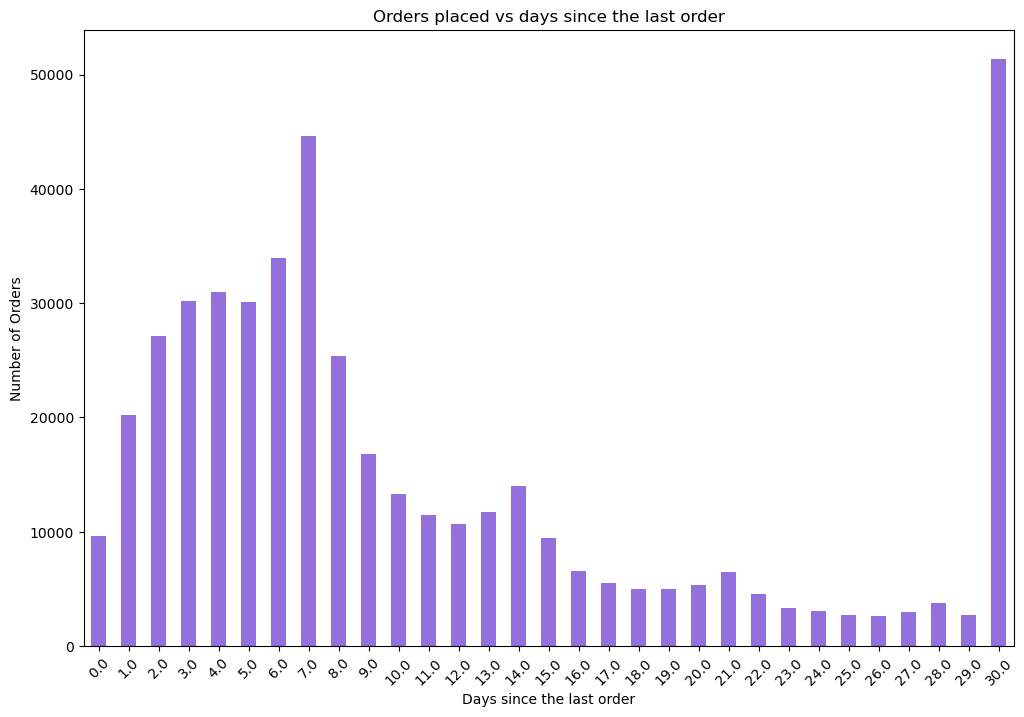

In [64]:
#we start by grouping the orders by days since prior order and then counting the number of orders for each waiting period
orders_days_prior = orders.groupby('days_since_prior_order')['order_id'].count()

#We plot this as a bar graph
orders_days_prior.plot(kind='bar',
                       title='Orders placed vs days since the last order',
                            xlabel='Days since the last order',
                            ylabel='Number of Orders',
                            figsize=[12, 8],
                            color='mediumpurple',
                            rot=45)
plt.show()

It appears that most people shop for groceries on a monthly basis (every thirty days). It is likely that people make bulk purchases on a monthly basis to make use of bulk discounts, free shipping on large orders, the convenience of saving time, or perhaps the ease of arranging to be home during scheduled delivery times when perishable items are being delivered.
Another big customer group are those that purchase weekly, which is a more frequent purchase frequency and likely those that shop on weekends when they are not working.

In [66]:
#We would like to see how many orders the customers who order weekly and monthly place since these are the groups that place the most orders
day_prio7 = orders_days_prior.loc[7]
print(day_prio7)
day_prio30 = orders_days_prior.loc[30]
print(day_prio30)

#We would like to see the difference in order volume between the two groups, especially since the weekly group hews closer to the middle of the main distribution of orders
print(f"the difference in orders between customers who shop monthly and weekly, the two highest volume groups, is:{day_prio30-day_prio7}")

44577
51337
the difference in orders between customers who shop monthly and weekly, the two highest volume groups, is:6760


Since the difference in orders placed between the customers who shop weekly and thoser who shop monthly is 6760, roughly 10%, it would make sense to hone in on the motivations for the weekly customers since they shop more frequently and make up more than enough in volume.
Most of the shopping happens roughly on a 2-8 day frequency and it tapers after that, except for the monthly buyers who are outliers. So it generally makes sense to understand the behavior of frequent shoppers and try to make deals or vouchers that they find attractive.

## Customer Behavior Analysis

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

Min and max value for orders_wednesday: 4 4


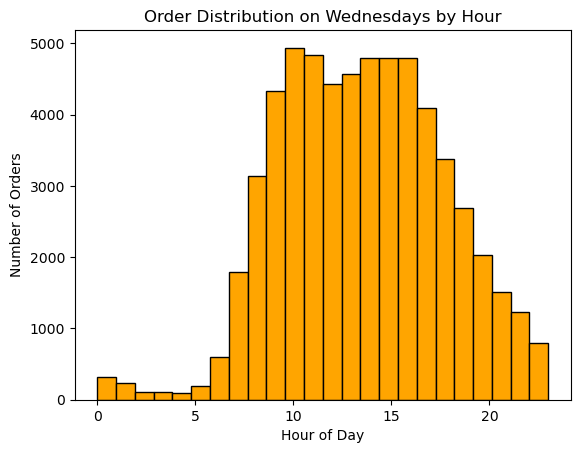

In [70]:
#we filter orders based on the day of the week
orders_wednesday = orders[orders['order_dow'] == 4]
#we check that the filtering worked and ensure it only captures orders for wednesday
print("Min and max value for orders_wednesday:", orders_wednesday['order_dow'].min(),orders_wednesday['order_dow'].max())

#we group orders by hour of the day and count the orders per hour
orders_wednesday_byhour = orders_wednesday.groupby('order_hour_of_day')['order_id'].count()

#we plot the histogram for the series object. type hist did not work so we used this instead and weighted by the values in the series
plt.hist(orders_wednesday_byhour.index, bins=24, weights=orders_wednesday_byhour, 
         color='orange', edgecolor='black', label="Orders on Wednesday")

#labels for axes and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution on Wednesdays by Hour')

#display graph
plt.show()

Min and max value for orders_wednesday: 0 0


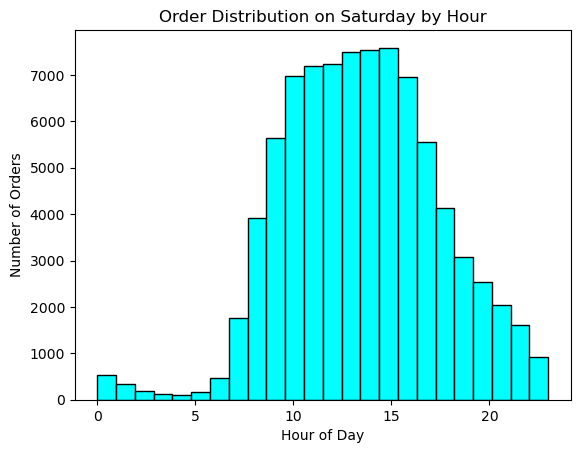

In [71]:
#we filter orders based on the day of the week
orders_saturday = orders[orders['order_dow'] == 0]
#we check that the filtering worked and ensure it only captures orders for saturday
print("Min and max value for orders_wednesday:", orders_saturday['order_dow'].min(),orders_saturday['order_dow'].max())

#we group orders by hour of the day and count the orders per hour
orders_saturday_byhour = orders_saturday.groupby('order_hour_of_day')['order_id'].count()

#we plot the histogram for the series object. type hist did not work so we used this instead and weighted by the values in the series
plt.hist(orders_saturday_byhour.index, bins=24, weights=orders_saturday_byhour, 
         color='aqua',edgecolor='black', label="Orders on Saturday")

#labels for axes and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution on Saturday by Hour')

#display graph
plt.show()

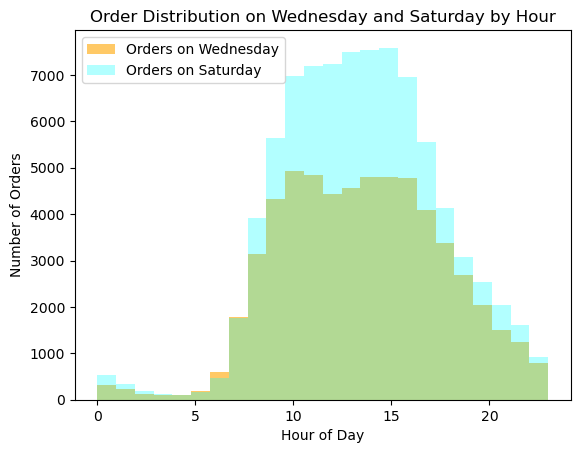

In [72]:
#replot the histograms for saturday and wednesday with some transparency and without edges to see overlap better
plt.hist(orders_wednesday_byhour.index, bins=24, weights=orders_wednesday_byhour, 
         alpha=0.6, color='orange', label="Orders on Wednesday")
plt.hist(orders_saturday_byhour.index, bins=24, weights=orders_saturday_byhour, 
         alpha=0.3, color='aqua', label="Orders on Saturday")

#Axes labels, legends and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution on Wednesday and Saturday by Hour')
plt.legend()

#display graph
plt.show()

The distribution of orders by the hour on Saturday and Wednesday follows the same pattern through the course of the day for the majority of the time with increased volume on Saturday compared to Wednesday on average. This increase in volume of orders on Saturdays can be clearly seen between 10 AM and 5 PM, with less pronounced effects observed at 9AM-10AM and 5-6 Pm after which the difference in sales volume between the two days drops of gradually through the night.
The increase in sales on Saturday makes sense since it is the weekend and people do tend to have more time to shop.
However, in the morning from 7-8 AM on Wednesdays we see a reversal in this trend. We see a slight increase in the volume of sales on Wednesday compared to Saturday. It is a very minimal surge but since it runs in opposition to the expected trend, it is interesting.
It would be worthwhile to see what causes this surge on Wednesdays. Do people run out of essentials mid-week and scramble to place an order for these before they head out to work? Are other factors responsible for this?

v

### What's the distribution for the number of orders per customer?

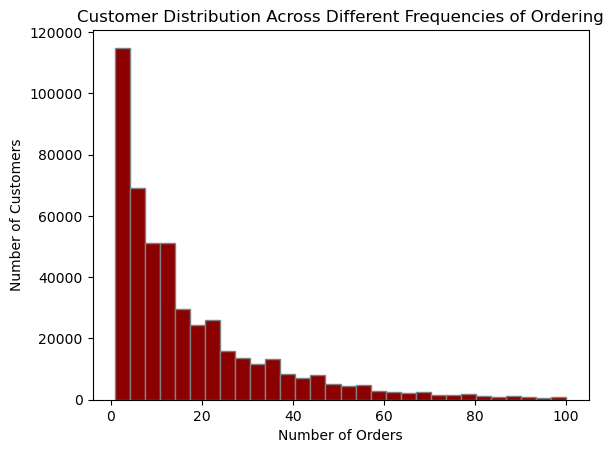

In [76]:
#we group orders by number of orders placed by the customer and count the number of unique customer ids per number of orders
orders_percustomer = orders.groupby('order_number')['user_id'].nunique()

#plot the histogram weighting using the series values
plt.hist(orders_percustomer.index, bins=30, weights=orders_percustomer, 
         color='darkred', edgecolor='grey', label="Customers by frequency")

#Axes labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Different Frequencies of Ordering')

#display graph
plt.show()

We see from the above graph that most customers place very few orders on a monthly basis.
Most of the customers (>100,000) place orders less than 3 times a month. 
Customers who place more than 12 orders a month are very few. In total this group can be estimated to be around 120,000 or so. 
Those who place 12 orders or less are roughly 290000 in total, roughly 2.5 fold the customers who place orders more frequently.
The bulk of the customers shop at a bi-weekly cadence and those at the tail end of this group shop twice a week at most.

### What are the top 20 popular products (display their id and name)?

In [79]:
#created a series grouping the products by product_id and countign the number of orders of each product
products_qty = order_products.groupby('product_id')['order_id'].count()

#merged this series with the product data frame using the index of the series which is product_id and product_id column of the dataframe
merged_prod = pd.merge(products, products_qty,left_on='product_id', right_index=True, how='left')
#renamed the order_id column to number of product orders for clarity
merged_prod.rename(columns={'order_id': 'number_of_product_orders'}, inplace=True)

#sorted the merged dataframe based on the number of product orders column in descending order and stored in a new variable
final = merged_prod.sort_values('number_of_product_orders', ascending=False)
#printed the first 20 values of this dataframe to get the 20 most popular products
display(final[['product_id', 'product_name', 'number_of_product_orders']].head(20))

,product_id,product_name,number_of_product_orders
24851,24852,banana,66050.0
13175,13176,bag of organic bananas,53297.0
21136,21137,organic strawberries,37039.0
21902,21903,organic baby spinach,33971.0
47208,47209,organic hass avocado,29773.0
47765,47766,organic avocado,24689.0
47625,47626,large lemon,21495.0
16796,16797,strawberries,20018.0
26208,26209,limes,19690.0
27844,27845,organic whole milk,19600.0


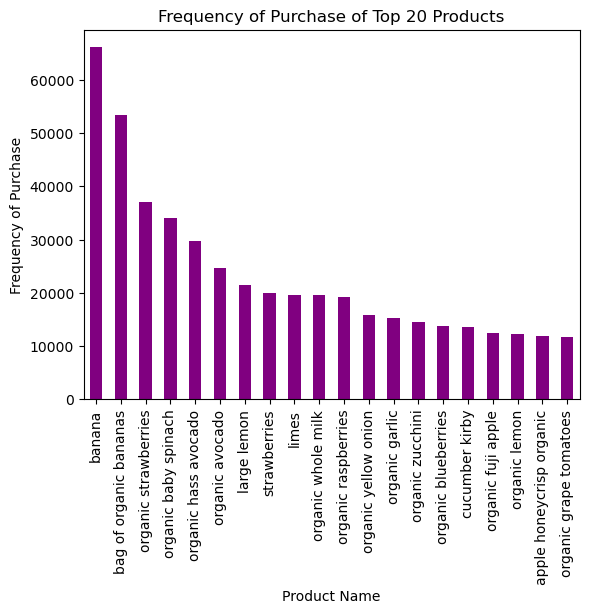

In [80]:
#Assigned top 20 reorderd items list to a new variable
Popular_20 = final[['product_id', 'product_name', 'number_of_product_orders']].head(20)
#plot with prodict name on x-axis and reorder frequency on y-axis
Popular_20.plot(x='product_name',
                y='number_of_product_orders',
                kind='bar',
                title='Frequency of Purchase of Top 20 Products',
                xlabel='Product Name',
                ylabel='Frequency of Purchase',
                color='purple')
#remove legend
plt.legend('', frameon=False)
#show plot
plt.show()

The best format to look at this data, as a table. I do not think plotting this improves the visualization by much.

Organic produce seems very popular dominating the upper half of the table. Also, the only non-produce item on this list is milk. And the produce skews towards fresh fruit by a small margin(50% of the top 20). There seems to be a great shift of shoppers towards helathier eating and eating organic, focused on fresh, organic produce.

### How many items do people typically buy in one order? What does the distribution look like?

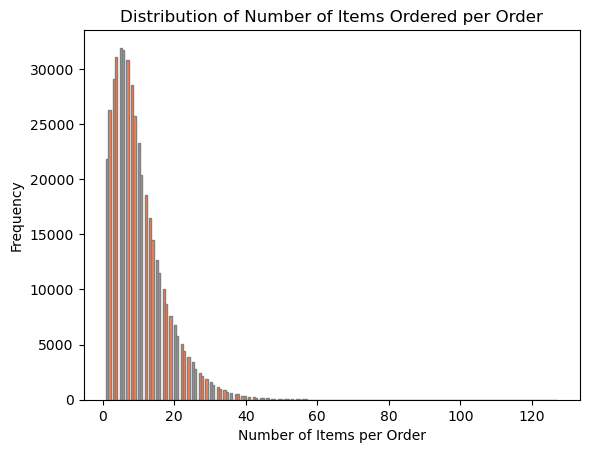

In [83]:
#group the order products group by order id and then count the number of products in each order
number_perorder = order_products.groupby('order_id')['product_id'].count()

#plot the histogram weighting using the series values
plt.hist(number_perorder, bins=200,
         color='coral', edgecolor='grey', label="Number of Items per order")

#Axes labels and title
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Items Ordered per Order')

#display graph
plt.show()                                                                           

In [84]:
#create a new series by running value counts on the series created by counting products per order
#this will return a series with the index showing the range of number of products purchased per order and the values of the series being how frequently this number of products is purchased
number_perorder_freq = number_perorder.value_counts()

#number of products that have maximum frequency
max_ordered_num = number_perorder_freq.idxmax()
#how often has this number of products been purchased
max_ordered_freq = number_perorder_freq.max()
print(f"Most customers order {max_ordered_num} items and this number of items have been purchased {max_ordered_freq} times") 

Most customers order 5 items and this number of items have been purchased 31923 times


Most customers purchase around 5 products per order. The distribution of product numbers around this maximum is a skewed distribution with a steep drop on the left and a more gradual taper to the right of the x-axis. This indicates that not a lot of orders have fewer than five items but above five items the order numbers reduce gradually until about 40. Very few customers buy more than 40 items in one order, indicating that there are not a lot of bulk purchases. Most people are most likely restocking grocery items they run out of or making spontaneous purchases on the go.

### What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [87]:
#filtered the dataframe to only consider products that have been reordered
products_reorder = order_products[order_products['reordered']==1]
#grouped this dataframe by product name and summed reorder values for each product to get frequency of reorders per product in the series value
products_reorder_num = products_reorder.groupby('product_id')['reordered'].sum()

#merged this series with the product data frame using the index of the series which is product_id and product_id column of the dataframe
merged_prod_reorder = pd.merge(products, products_reorder_num,left_on='product_id', right_index=True, how='left')

#renamed the reordered column to reordered frequency for clarity
merged_prod_reorder.rename(columns={'reordered': 'reordered_frequency'}, inplace=True)

#sorted the merged dataframe based on the reordered frequency column in descending order and stored in a new variable
final_reorder_prod = merged_prod_reorder.sort_values('reordered_frequency', ascending=False)

#printed the first 20 values of this dataframe to get the 20 most popular products
display(final_reorder_prod[['product_id', 'product_name', 'reordered_frequency']].head(20))


,product_id,product_name,reordered_frequency
24851,24852,banana,55763.0
13175,13176,bag of organic bananas,44450.0
21136,21137,organic strawberries,28639.0
21902,21903,organic baby spinach,26233.0
47208,47209,organic hass avocado,23629.0
47765,47766,organic avocado,18743.0
27844,27845,organic whole milk,16251.0
47625,47626,large lemon,15044.0
27965,27966,organic raspberries,14748.0
16796,16797,strawberries,13945.0


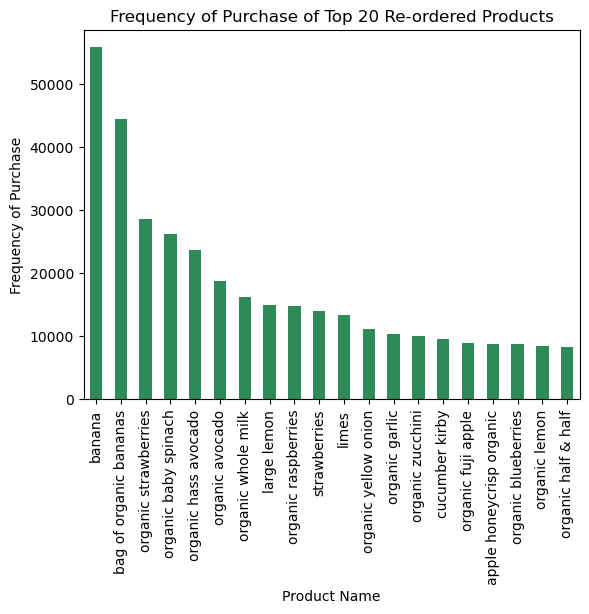

In [88]:
#Assigned top 20 reorderd items list to a new variable
final_reord_20 = final_reorder_prod[['product_id', 'product_name', 'reordered_frequency']].head(20)
#plot with prodict name on x-axis and reorder frequency on y-axis
final_reord_20.plot(x='product_name',
                        y='reordered_frequency',
                        kind='bar',
                        title='Frequency of Purchase of Top 20 Re-ordered Products',
                        xlabel='Product Name',
                        ylabel='Frequency of Purchase',
                        color='seagreen')
#remove legend
plt.legend('', frameon=False)
plt.show()

Again, in this list we see a repeat of themes from the most popular products list. In fact there is almost complete overlap in the values from the two lists. There is a difference in the last item which was organic tomatoes in the most popular products list while here it is organic half and half. The theme is consistent. The most popular products are fresh organic produce. From previous analysis we see that the customer base buys a few items on rotation and not in bulk, which agrees with the perishable nature of most of the products purchased. Customers likely view Instacart as having a good selection of organic produce but would prefer to buy pantry staples,snacks and cleaning supplies etc. elsewhere.

### For each product, what proportion of its orders are reorders?

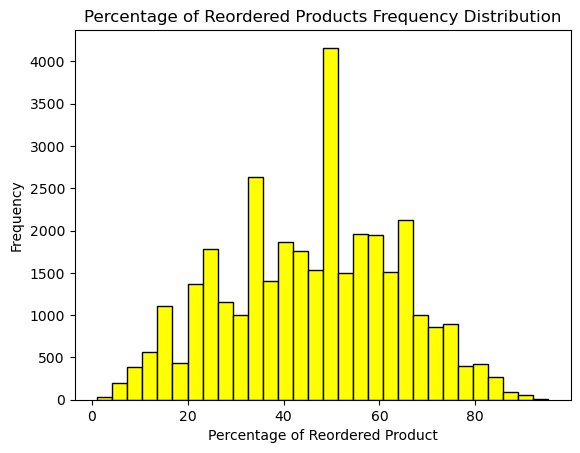

In [91]:
#filtered the dataframe to only consider products that have not been reordered
products_no_reorder = order_products[order_products['reordered']==0]

#grouped the earlier created reordered dataframe by product name and summed reorder values for each product to get number of reorders per product in the series value
products_reorder_ordercount = products_reorder.groupby('product_id')['order_id'].nunique()

#grouped the not reordered dataframe by product name and summed reorder values for each product to get number of not reorders per product in the series value
products_no_reorder_ordercount = products_no_reorder.groupby('product_id')['order_id'].nunique()

#performed operation to get the total orders per product
total_ordercount = products_reorder_ordercount + products_no_reorder_ordercount
#operation to get proportion of re-orders
proportion_reorder = (products_reorder_ordercount/total_ordercount)*100

#Histogram to show frequency distribution of various re-order percentages
plt.hist(proportion_reorder, bins=30,
         color='yellow', edgecolor='black', label="proportion reordered")
#Axes labels and title
plt.xlabel('Percentage of Reordered Product')
plt.ylabel('Frequency')
plt.title('Percentage of Reordered Products Frequency Distribution')

#display graph
plt.show()                                           

In [92]:
#create a new series by running value counts on the series of proportion reorder
#this will return a series with the index showing the range of number of proportions and the values of the series being how frequently this proportion is observed
proportion_arranged = proportion_reorder.value_counts()

#maximum reorder proportion by frequency
max_proportion = proportion_arranged.idxmax()
#frequency of reorder of these products
max_prop_freq = proportion_arranged.max()
print(f"For {max_prop_freq} products reorders make up {max_proportion} Percent of the orders")

#we merge the order_products on products and group by product name and id and then generate the mean for each reorder value which should give a percentage of reordered product
display(order_products.merge(products).groupby(['product_id', 'product_name'])['reordered'].mean())

For 3273 products reorders make up 50.0 Percent of the orders


product_id  product_name                                                     
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
                                                                                   ...   
49690       high performance energy drink                                        0.800000
49691       original pancake & waffle mix                                        0.430556
49692       organic instant oatmeal light maple brown sugar                      0.416667
49693       spring water body wash                                               0.440000
49694       burrito- s

For close to 3500 products, reorders make up 50% of their orders. There is a close to normalized distribution of reorders for every product with the percentage of re-orders dropping pretty evenly on either side of the 50% maximum, except for some evenly spaced outliers on either side of the peak value.

In [94]:
# Reviewer's code 

order_products.merge(products).groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
                                                                                   ...   
49690       high performance energy drink                                        0.800000
49691       original pancake & waffle mix                                        0.430556
49692       organic instant oatmeal light maple brown sugar                      0.416667
49693       spring water body wash                                               0.440000
49694       burrito- s

### For each customer, what proportion of their products ordered are reorders?

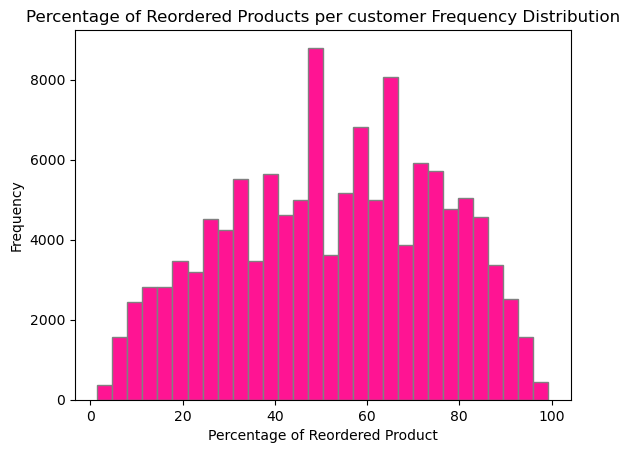

In [96]:
#merged orders and order_products dataframes on the order_id column as basis
merged_order_prods = pd.merge(orders,order_products,on='order_id')

#filtered the dataframe to only consider products that have been reordered
merged_reorders = merged_order_prods[merged_order_prods['reordered']==1]
#filtered the dataframe to only consider products that have not been reordered
merged_no_reorders = merged_order_prods[merged_order_prods['reordered']==0]

#grouped the reordered dataframe by user id and found the number of products reordered grouped by customer
customers_reordered = merged_reorders.groupby('user_id')['product_id'].count()
#grouped the not reordered dataframe by user id and found the number of products not reordered grouped by customer
customers_no_reordered = merged_no_reorders.groupby('user_id')['product_id'].count()
#calculated total orders grouped by customer
customers_total = customers_reordered + customers_no_reordered
#calculated porportion of reordered product 
proportion_reorder_customers = (customers_reordered/customers_total)*100

#plot histogram showing the frequency of the proportions of reordered product
plt.hist(proportion_reorder_customers, bins=30,
         color='deeppink', edgecolor='grey', label="proportion reordered")
#Axes labels and title
plt.xlabel('Percentage of Reordered Product')
plt.ylabel('Frequency')
plt.title('Percentage of Reordered Products per customer Frequency Distribution')

#display graph
plt.show()   

In [97]:
#create a new series by running value counts on the series proportion reorder customers
#this will return a series with the index showing the range proportions and the values of the series being how frequently this proportion is observed
proportion_bycustomer_freq = proportion_reorder_customers.value_counts()

#maximum reorder proportion by frequency
max_proportion_cust = proportion_bycustomer_freq.idxmax()
#frequency of reorder of these products
max_prop_freq_cust = proportion_bycustomer_freq.max()
print(f"For {max_prop_freq_cust} customers reorders make up {max_proportion_cust} Percent of the orders")

For 6524 customers reorders make up 50.0 Percent of the orders


For 6524 customers, reorders make up 50% of their orders. 
Again,this frequency distribution is a close to a normalized distribution of proportions of reorders for every product with the percentage of re-orders dropping pretty evenly on either side of the 50% maximum, except for some evenly spaced outliers on either side of the peak value.
this distribution is interesting. For the largest group of customers, only 50% of the products that they purchased were reorders, which indicates either (a) clientale willing to experiment with new purchases or
(b)those who are unhappy with the quality/other features of the products they buy and end up needing to keep trying alternatives
This needs further investigation.

### What are the top 20 items that people put in their carts first? 

,name_of_product,number of orders
24851,banana,15562
13175,bag of organic bananas,11026
27844,organic whole milk,4363
21136,organic strawberries,3946
47208,organic hass avocado,3390
21902,organic baby spinach,3336
47765,organic avocado,3044
19659,spring water,2336
16796,strawberries,2308
27965,organic raspberries,2024


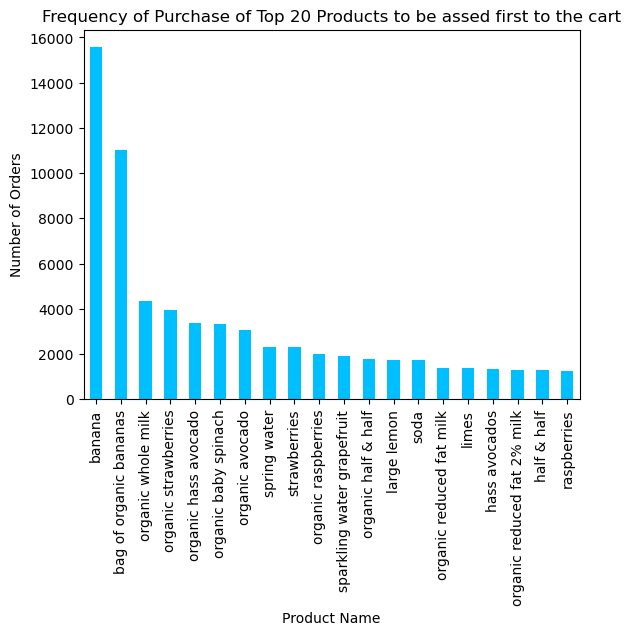

In [100]:
# Merge the products data with the favorites (order_products and merged_prod)
merged_prod_add = pd.merge(merged_prod, order_products, on='product_id')

# Group by 'product_id' and calculate the mean 'add_to_cart_order'
favorites_grouped = merged_prod_add.groupby('product_id')['add_to_cart_order'].mean()

# Merge the grouped favorites data with the product details
fave_merged = pd.merge(merged_prod_add, favorites_grouped, left_on='product_id', right_index=True, how='left')

# Rename the column to 'add_to_cart_order_average'
fave_merged.rename(columns={'add_to_cart_order_x': 'add_to_cart_order_average'}, inplace=True)

# Filter for products added first (i.e., add_to_cart_order == 1)
faves_first_added = fave_merged[fave_merged['add_to_cart_order_average'] == 1]

# Group by 'product_id' and count how many times each product was added to the cart first
top_products_first_added = faves_first_added.groupby('product_id')['product_name'].count()

# Sort the products by count in descending order (most frequently added first)
top_products_first_added_sorted = top_products_first_added.sort_values(ascending=False)

# Get the top 20 most frequently added products
top_20_first_added = top_products_first_added_sorted.head(20)

# Merge the top 20 with products data to get the product names
top_20_first_added_names = pd.merge(top_20_first_added, products[['product_id', 'product_name']], left_index=True, right_on='product_id', how='left')

# Rename the column to 'add_to_cart_order_average'
top_20_first_added_names.rename(columns={'product_name_y': 'name_of_product'}, inplace=True)
top_20_first_added_names.rename(columns={'product_name_x': 'number of orders'}, inplace=True)


#Assigned top 20 reorderd items list to a new variable
final_top_20 = top_20_first_added_names[['name_of_product', 'number of orders']]

# Display the results
display(final_top_20)

#plot with prodict name on x-axis and reorder frequency on y-axis
final_top_20.plot(x='name_of_product',
                  y='number of orders',
                  kind='bar',
                  title='Frequency of Purchase of Top 20 Products to be assed first to the cart',
                  xlabel='Product Name',
                  ylabel='Number of Orders',
                  color='deepskyblue')
#remove legend
plt.legend('', frameon=False)
plt.show()

Similiar to the most popular orders and the most frequently reordered products, the most popular items to be added first to the cart have a perfect overlap with the most frequently re-ordered and shows a similiar trend of being populated with fresh organic produce and organic products. 
Considering that these are also the most frequently re-ordered these are likely to be parts of regular purchases by customers, products that they instinctively add to the cart without much thought and items they are less likely to experiment with.

## Summary of Findings ##
Taking the entire analysis into account, the customer base seems to be frequent shoppers who do regular grocery runs every weekend and seem to prefer shopping during the day.
We do see a big group of customers that shop on a monthly basis and it would be interesting to see whether the kind of purchases they make differ from the other groups.

There is a surge of customers on Wednesday early in the morning that is higher than the same time on Saturday which is a peak shopping day. It would be interesting to understand the behavior of this group, what are the key motivations to shop at this time.

Customers seem to shop mostly for fresh organic produce and dairy and not purchase as many pantry staples, snacks, cleaning supplies or other product categories. It may be worthwhile to see whether this is because of brand recognition in the organic space or negative perception in other areas (e.g. price considerations may be important for pantry items or other bulk purchase compatible items).

Of the items that customers ordered, they re-ordered, in most cases, around 50% of them. It might be worthwhile to investigate if this is because the customer base likes to experiment or is the motivation not to re-order the low quality/satisfaction with the previously ordered product.

Again, on average around 50% of a products total sales on average can be accounted to re-orders. Considering that majority of the customers shop at a cadence of roughly bi-weekly rates to twice weekly, we could expect higher re-order rates for staples.
Further comparison with other data sets, including price, customer satisfaction surveys etc, could provide more insight.

## Conclusion
We have analyzed the consumer behavior of customers on Instacart.
We have processed the data for duplicates and missing values. We have changed data types and made other modifications to improve the analysis.
We analyzed the dataset to understand peak shopping times both in terms of the day of the week or the hours of the day.
As expected shopping peaks during the weekend and not a lot of shopping happens late in the night.
We analyzed the nature of products purchased, how often they were re-ordered, their popularity, how often they were the first purchase made etc. 
We also looked at the frequency of customer purchases.
The consumer base showed a marked preference for fresh organic produce when shopping at instacart and these were regularly the first items added to the cart and reordered. Most customers purchase 5-8 items and place around ten orders.
They mostly buy items weekly though there is a large group that places orders once a month.